In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import animation
from IPython.display import HTML
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
plt.style.use('seaborn-talk')
%matplotlib inline

In [2]:
# Set up colors:
color_map = ListedColormap(['#1b9e77', '#d95f02', '#7570b3'])

In [3]:
# Make raw data using blobs
X, y = make_blobs(
    n_samples=200,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=0
)

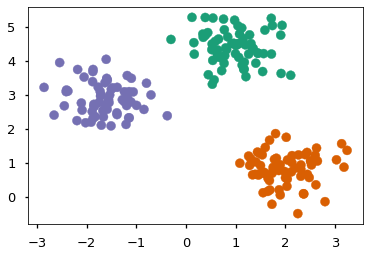

In [4]:
# Plot the raw data:
plt.scatter(X[:,0], X[:, 1], c=y, cmap=color_map)

In [5]:
# Define some initial centers, these are designed to be "bad":
initial = np.array(
    [
        [-3.0, 0.0],
        [-2.0, 0.0],
        [-1.0, 0.0],
    ]
)
y_c = [0, 1, 2]

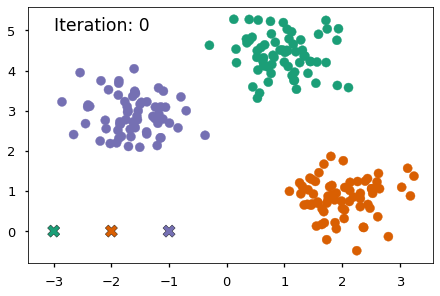

In [6]:
# Plot the initial situation:
fig0, ax0 = plt.subplots(constrained_layout=True)
ax0.scatter(X[:,0], X[:, 1], c=y, cmap=color_map)
ax0.scatter(initial[:,0], initial[:, 1],
            c=y_c, cmap=color_map, marker='X', edgecolors='black', s=150)
ax0.text(-3, 5, 'Iteration: 0', fontsize='xx-large')
xlim = ax0.get_xlim()
ylim = ax0.get_ylim()
results = [(np.full_like(y, 0), initial)]

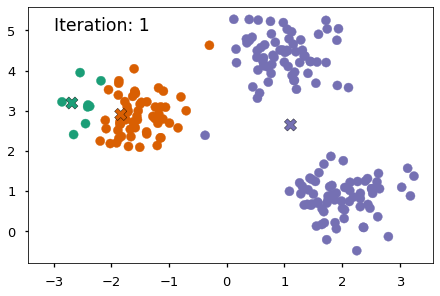

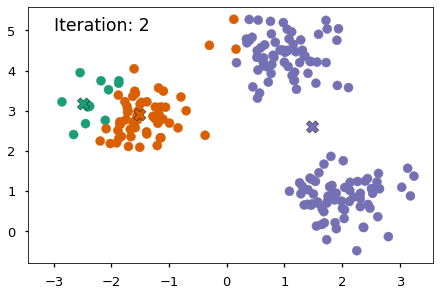

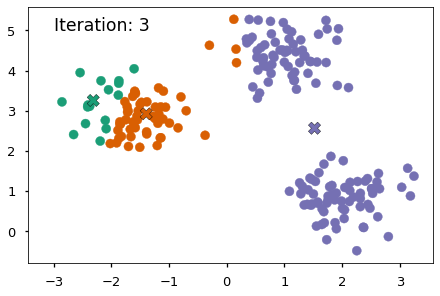

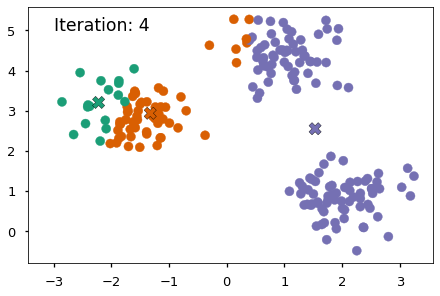

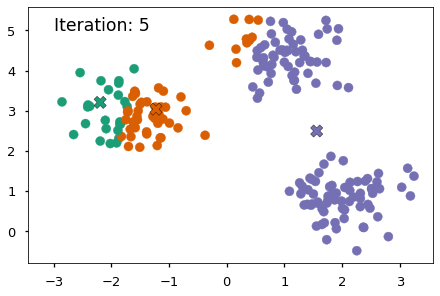

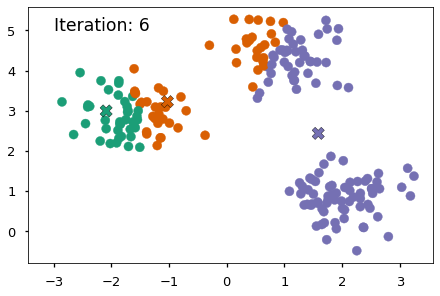

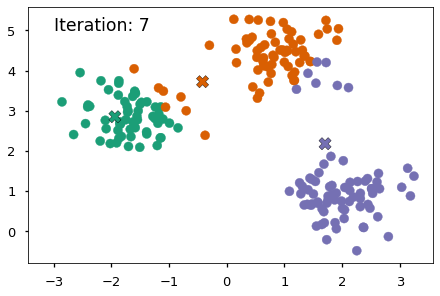

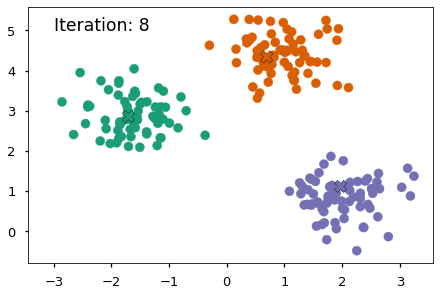

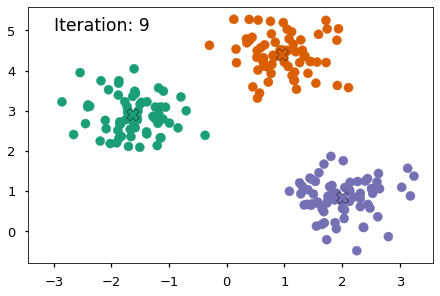

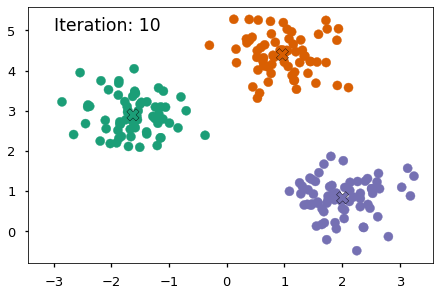

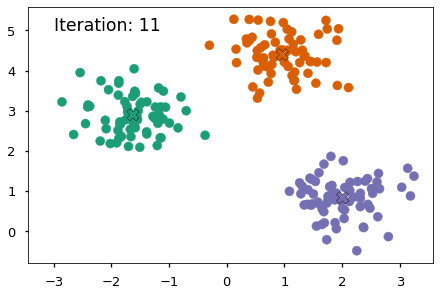

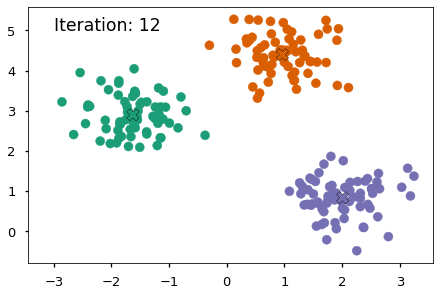

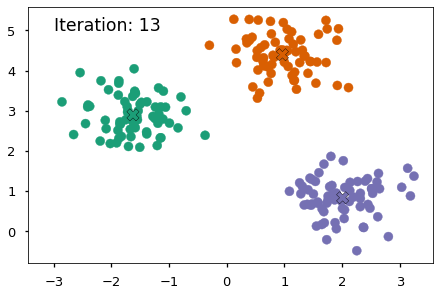

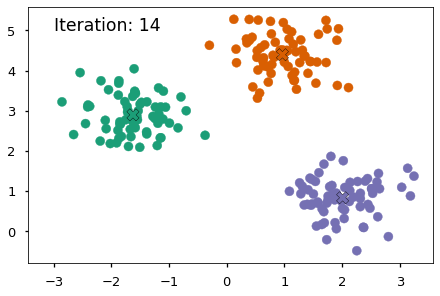

In [7]:
# Run clustering for different number of maximum iterations:
max_clusters = 15
for iterations in range(1, 15):
    km = KMeans(n_clusters=3, init=initial, n_init=1, max_iter=iterations,
                random_state=0)
    y_km = km.fit_predict(X)
    results.append((y_km, km.cluster_centers_))
    figi, axi = plt.subplots(constrained_layout=True)
    axi.scatter(X[:, 0], X[:, 1], c=y_km, cmap=color_map)
    axi.set_xlim(xlim)
    axi.set_ylim(ylim)
    axi.text(-3, 5, 'Iteration: {}'.format(iterations), fontsize='xx-large')
    axi.scatter(km.cluster_centers_[:, 0],
                km.cluster_centers_[:, 1],
                c=y_c, cmap=color_map,
                marker='X', edgecolors='black', s=150)

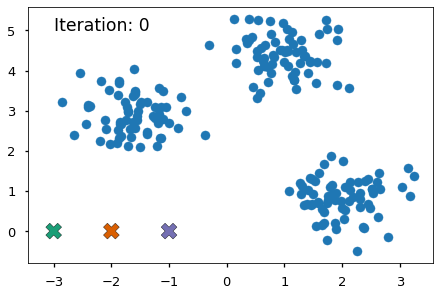

In [8]:
# Create an animation:
fig2, ax2 = plt.subplots(constrained_layout=True)
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
yi, centers = results[0]
scat = ax2.scatter(X[:, 0], X[:, 1])
cent = ax2.scatter(centers[:, 0], centers[:, 1], c=y_c, cmap=color_map,
                   marker='X', edgecolors='black', s=250)
text = ax2.text(-3, 5, 'Iteration: 0', fontsize='xx-large')

In [9]:
def animate(i):
    """Update the animation."""
    yi, centers = results[i]
    cent.set_offsets(centers)
    text.set_text('Iteration: {}'.format(i))
    if i == 0:
        colors = ['#377eb8' for _ in yi]
    else:
        colors = [color_map.colors[j] for j in yi]
    scat.set_facecolors(colors)
    return (cent, scat, text)

In [12]:
anim = animation.FuncAnimation(fig2, animate,
                               frames=max_clusters,
                               interval=300, blit=True, repeat=True)

In [13]:
HTML(anim.to_html5_video())